In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import scipy
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
merged_data = pd.read_csv('/Users/munisabakhromova/Desktop/research/merged_data.csv')

merged_data.head()

/var/folders/f8/xf4k31p91fq6xlyklv8cjx3m0000gn/T/ipykernel_70819/3831768791.py:1: DtypeWarning: Columns (16,62,65,67,68,70,71,74,78,79,80,81,82,83,85,87,89,90,93,95,96,98,100,101,102,103,104,108,109,110,111,112,113,114,115,116,117,119,120,124,125,128,130,136,137,138,141,143,146,147,148,153,158,162,164,165,167,169,170,172,173,174,177,183,185,186,187,188,189,190,191,192,193,194,197,199,200,201,202,203,204,205,207,208,209,210,212,213,214,215,217,220,221,223,225,230,231,232,236,238,239,240,241,244,245,246,247,251,253,255,259,260,261,262,264,266,267,271,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,353,354,355,356,358,365,367,369,370,371,372,373,374,376,377,378,379,380,381,382,383,385,386,388,394,395,396,397,398,399,400,405,406,412,413,414,415,416,417,418,4

,country,isocode,ison,region,language,date,id_gallup,wgt_x,patience,risktaking,...,WP9701,WP9702,WP9704,WP98,WP9811,WP9896,WP99,WP9903,YEAR_CALENDAR,YEAR_WAVE
0,Turkey,TUR,792.00,Adana,Turkish,2012-03-07,7100800000001.00,0.27,0.05,1.02,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
1,Turkey,TUR,792.00,Adana,Turkish,2012-03-08,7100800000002.00,0.27,-0.68,0.39,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
2,Turkey,TUR,792.00,Adana,Turkish,2012-03-08,7100800000003.00,0.44,0.32,1.02,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
3,Turkey,TUR,792.00,Adana,Turkish,2012-03-07,7100800000004.00,1.42,0.50,1.27,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
4,Turkey,TUR,792.00,Adana,Turkish,2012-03-07,7100800000005.00,0.71,0.59,1.12,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012


In [3]:
num_samples = 1000
fraction = 0.5
pref="patience"

def random_sampling_pref(data, preference, num_samples, fraction):
   
   # Initialize an empty DataFrame to store the results
   df = pd.DataFrame()   
   sampled_data = pd.DataFrame()
   
   # Repeat the sampling process for a specified number of iterations
   for i in range(num_samples):
      # Group by 'country' and sample half of the observations with replacement
      sampled_data = data.groupby("country")[preference].apply(lambda x: x.sample(frac=fraction, replace=True)).reset_index(level=1,drop=True)
      sampled_data.name = f"{preference}_{i+1}"
      
      # Concatenate the sampled data to the result DataFrame
      df = pd.concat([df, sampled_data], axis=1)

   return df

pref_samples = random_sampling_pref(merged_data,preference=pref, num_samples=num_samples, fraction=fraction)
pref_samples

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
Afghanistan,0.78,-0.04,-0.93,-0.04,1.41,-0.68,0.77,-0.42,1.73,-0.93,...,0.90,-0.17,-1.06,-0.29,-1.06,0.06,-0.68,-0.68,0.51,-0.62
Afghanistan,0.25,-0.42,-0.04,-1.31,-0.04,-0.04,-0.04,0.21,-0.04,0.02,...,-0.08,-0.04,-0.31,0.68,-0.17,-1.31,-0.10,0.36,-0.17,-0.68
Afghanistan,-0.42,0.21,-0.29,0.77,-0.29,-0.05,-1.06,-0.42,-1.19,-0.42,...,-0.04,-0.04,1.05,-0.55,-0.93,1.05,-1.31,-0.42,-0.42,0.74
Afghanistan,-0.04,-0.04,-0.04,-0.80,-0.29,0.67,-0.29,-0.17,-0.08,-0.68,...,1.32,-0.40,-0.40,-0.55,-0.42,-0.93,-0.68,-0.68,-0.04,-0.68
Afghanistan,-0.04,-0.04,-1.31,-0.55,-0.68,-0.42,-0.68,-0.93,-0.61,-0.29,...,-0.29,-1.06,-0.55,0.95,-0.29,0.68,-0.42,0.81,-1.31,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,0.39,-0.04,-0.42,-0.04,-0.17,-0.29,-0.04,0.96,-0.04,-0.55,...,-0.29,-0.29,-0.17,-0.93,-0.04,-1.06,-0.29,-0.17,-0.68,-0.93
Zimbabwe,-0.29,-0.17,-0.04,-0.04,-0.29,-0.55,-0.29,-0.42,-0.17,-0.04,...,-0.55,-0.04,-0.04,-0.04,0.61,-0.04,0.02,1.62,-0.55,-0.55
Zimbabwe,0.61,-0.04,-0.04,-0.55,-0.04,-0.04,-1.06,-0.17,-0.42,-0.04,...,-0.17,-0.04,-0.04,-0.04,1.41,-0.68,-0.68,-0.55,0.34,-0.80
Zimbabwe,2.11,-0.17,-0.68,-0.04,-0.34,-0.68,-0.04,-0.04,-0.04,-0.29,...,-0.42,-0.68,0.56,-0.93,-0.77,-0.04,0.75,0.59,0.25,-0.80


In [4]:
def generate_pref_measure_sample(data):
    patience_sample = pd.DataFrame(data.reset_index().rename(columns={'index': 'country'}).groupby(['country']).mean())
    return patience_sample
pref_measure_samples = generate_pref_measure_sample(pref_samples)
pref_measure_samples

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.21,-0.16,-0.25,-0.19,-0.20,-0.23,-0.26,-0.27,-0.21,-0.25,...,-0.18,-0.19,-0.18,-0.20,-0.23,-0.20,-0.25,-0.20,-0.21,-0.19
Algeria,0.12,-0.04,0.05,0.03,0.03,0.03,0.01,0.03,0.05,0.12,...,0.10,0.07,0.13,0.10,-0.00,0.11,-0.01,0.15,0.08,0.06
Argentina,-0.24,-0.25,-0.22,-0.26,-0.22,-0.21,-0.22,-0.28,-0.24,-0.26,...,-0.21,-0.26,-0.30,-0.23,-0.21,-0.20,-0.28,-0.24,-0.27,-0.26
Australia,0.76,0.72,0.70,0.69,0.75,0.77,0.61,0.65,0.82,0.73,...,0.79,0.65,0.63,0.62,0.71,0.70,0.71,0.75,0.71,0.72
Austria,0.52,0.60,0.47,0.51,0.51,0.48,0.58,0.59,0.54,0.60,...,0.52,0.56,0.52,0.49,0.60,0.49,0.60,0.57,0.60,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.52,0.58,0.58,0.58,0.48,0.57,0.52,0.51,0.60,0.59,...,0.61,0.51,0.54,0.54,0.55,0.55,0.54,0.53,0.52,0.57
United States,0.88,0.80,0.84,0.85,0.88,0.91,0.85,0.84,0.87,0.92,...,0.86,0.88,0.98,0.88,0.81,0.86,0.88,0.97,0.92,0.85
Venezuela,-0.27,-0.25,-0.26,-0.30,-0.24,-0.28,-0.30,-0.24,-0.22,-0.19,...,-0.28,-0.20,-0.21,-0.24,-0.30,-0.25,-0.26,-0.31,-0.20,-0.31


In [5]:
country_level=pd.read_stata('/Users/munisabakhromova/Desktop/research/GPS_Dataset/GPS_dataset_country_level/country.dta')
country_level

,country,isocode,patience,risktaking,posrecip,negrecip,altruism,trust
0,Afghanistan,AFG,-0.20,0.12,0.29,0.25,0.17,0.32
1,Algeria,DZA,0.06,0.39,-0.60,0.25,-0.01,-0.18
2,Argentina,ARG,-0.23,0.04,0.16,-0.14,0.03,-0.21
3,Australia,AUS,0.66,0.14,0.07,0.02,0.16,0.30
4,Austria,AUT,0.61,-0.06,0.16,-0.06,-0.04,0.15
...,...,...,...,...,...,...,...,...
71,United Kingdom,GBR,0.54,0.05,-0.04,0.02,0.03,0.23
72,United States,USA,0.81,0.12,0.20,0.01,0.41,0.15
73,Venezuela,VEN,-0.23,0.25,0.05,-0.20,0.08,0.11
74,Vietnam,VNM,0.11,-0.01,-0.27,-0.14,-0.16,0.14


In [6]:
pref_measure_samples1=pd.merge(pref_measure_samples,country_level,how='left',on='country')
pref_measure_samples1

,country,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,...,patience_998,patience_999,patience_1000,isocode,patience,risktaking,posrecip,negrecip,altruism,trust
0,Afghanistan,-0.21,-0.16,-0.25,-0.19,-0.20,-0.23,-0.26,-0.27,-0.21,...,-0.20,-0.21,-0.19,AFG,-0.20,0.12,0.29,0.25,0.17,0.32
1,Algeria,0.12,-0.04,0.05,0.03,0.03,0.03,0.01,0.03,0.05,...,0.15,0.08,0.06,DZA,0.06,0.39,-0.60,0.25,-0.01,-0.18
2,Argentina,-0.24,-0.25,-0.22,-0.26,-0.22,-0.21,-0.22,-0.28,-0.24,...,-0.24,-0.27,-0.26,ARG,-0.23,0.04,0.16,-0.14,0.03,-0.21
3,Australia,0.76,0.72,0.70,0.69,0.75,0.77,0.61,0.65,0.82,...,0.75,0.71,0.72,AUS,0.66,0.14,0.07,0.02,0.16,0.30
4,Austria,0.52,0.60,0.47,0.51,0.51,0.48,0.58,0.59,0.54,...,0.57,0.60,0.59,AUT,0.61,-0.06,0.16,-0.06,-0.04,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,United Kingdom,0.52,0.58,0.58,0.58,0.48,0.57,0.52,0.51,0.60,...,0.53,0.52,0.57,GBR,0.54,0.05,-0.04,0.02,0.03,0.23
72,United States,0.88,0.80,0.84,0.85,0.88,0.91,0.85,0.84,0.87,...,0.97,0.92,0.85,USA,0.81,0.12,0.20,0.01,0.41,0.15
73,Venezuela,-0.27,-0.25,-0.26,-0.30,-0.24,-0.28,-0.30,-0.24,-0.22,...,-0.31,-0.20,-0.31,VEN,-0.23,0.25,0.05,-0.20,0.08,0.11
74,Vietnam,0.09,0.13,0.18,0.15,0.06,0.12,0.16,0.10,0.07,...,0.11,0.10,0.09,VNM,0.11,-0.01,-0.27,-0.14,-0.16,0.14


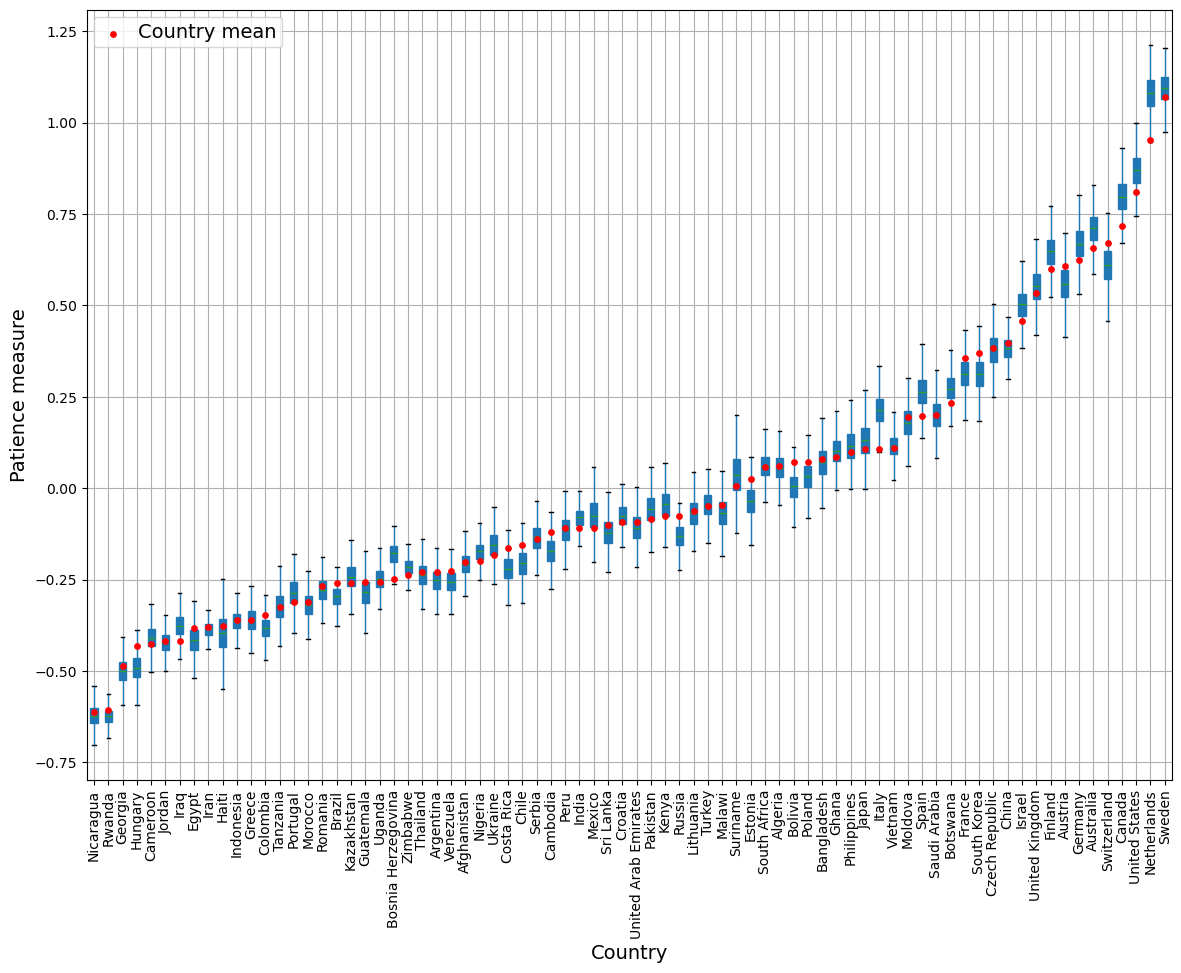

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pref_measure_samples and country_level are already defined

# Merge the dataframes
matched_data = pd.merge(pref_measure_samples, country_level, how='left', on='country')

# Sort the data by patience
sorted_data = matched_data.sort_values('patience')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the boxplot with x and y switched
boxplot = pref_measure_samples.loc[sorted_data['country']].transpose().boxplot(ax=ax, showfliers=False, patch_artist=True)

# Create a scatter plot with x and y switched
scatter = ax.scatter(range(1, len(sorted_data) + 1), sorted_data['patience'], marker='o', color='red', label='Country mean', zorder=10, s=15)

# Customize the plot
# ax.set_title('Patience', fontsize=16)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Patience measure', fontsize=14)
ax.set_xticks(range(1, len(sorted_data) + 1))
ax.set_xticklabels(sorted_data['country'], rotation='vertical')  # Rotate the country names vertically

# Modify the legend label font size
legend = ax.legend()
for text in legend.get_texts():
    text.set_fontsize(14)  # Adjust the font size as needed
# Save the plot as a PNG file
plt.savefig('/Users/munisabakhromova/Desktop/figure_1.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()




In [8]:
pref_rank_samples = pd.DataFrame()  
for i in pref_measure_samples.columns:
    if i != 'country':  # Check if the column is not 'country'
        pref_rank_samples[i] = pref_measure_samples[i].rank(ascending=False, method='min')
        pref_rank_samples[i] = pref_rank_samples[i].round().astype(pd.Int8Dtype())
    else:
        pref_rank_samples[i] = pref_measure_samples[i]

pref_rank_samples

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,51,45,56,49,50,54,56,57,52,56,...,46,48,49,50,54,50,51,50,50,49
Algeria,22,31,27,28,28,26,29,28,25,23,...,24,27,22,25,31,23,32,20,26,26
Argentina,55,57,53,56,52,52,52,58,54,59,...,49,55,59,54,53,49,57,54,57,56
Australia,5,5,5,5,5,4,8,6,5,6,...,5,5,7,7,5,5,5,5,5,5
Austria,10,8,10,10,10,11,9,8,9,9,...,11,9,10,11,8,10,9,9,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,11,9,9,8,11,9,10,11,8,10,...,9,11,9,9,10,9,10,11,9,10
United States,3,3,4,3,3,3,3,3,4,3,...,3,3,3,3,3,3,3,3,3,4
Venezuela,57,58,57,62,54,59,59,55,53,49,...,59,50,53,55,59,57,52,61,47,60


In [9]:
country_level['patience_rank'] = country_level['patience'].rank(ascending=False, method='min')
country_level


,country,isocode,patience,risktaking,posrecip,negrecip,altruism,trust,patience_rank
0,Afghanistan,AFG,-0.20,0.12,0.29,0.25,0.17,0.32,50.00
1,Algeria,DZA,0.06,0.39,-0.60,0.25,-0.01,-0.18,28.00
2,Argentina,ARG,-0.23,0.04,0.16,-0.14,0.03,-0.21,52.00
3,Australia,AUS,0.66,0.14,0.07,0.02,0.16,0.30,6.00
4,Austria,AUT,0.61,-0.06,0.16,-0.06,-0.04,0.15,8.00
...,...,...,...,...,...,...,...,...,...
71,United Kingdom,GBR,0.54,0.05,-0.04,0.02,0.03,0.23,10.00
72,United States,USA,0.81,0.12,0.20,0.01,0.41,0.15,3.00
73,Venezuela,VEN,-0.23,0.25,0.05,-0.20,0.08,0.11,51.00
74,Vietnam,VNM,0.11,-0.01,-0.27,-0.14,-0.16,0.14,20.00


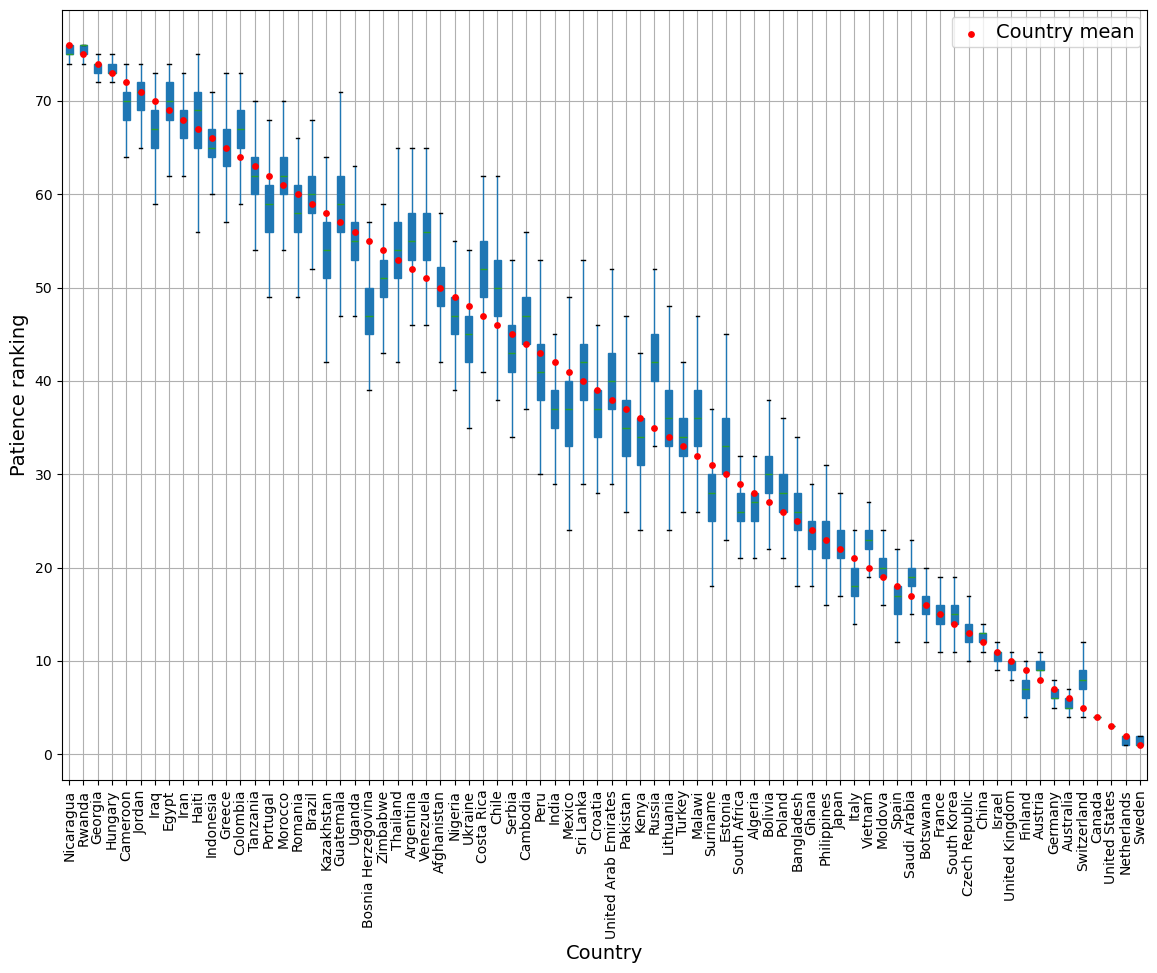

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pref_rank_samples and country_level are already defined

# Merge the dataframes
matched_data = pd.merge(pref_rank_samples, country_level, how='left', on='country')

# Sort the data by patience_rank in descending order
sorted_data = matched_data.sort_values('patience_rank', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the boxplot with x and y switched
boxplot = pref_rank_samples.loc[sorted_data['country']].transpose().boxplot(ax=ax, showfliers=False, patch_artist=True, bootstrap=100)

# Create a scatter plot with x and y switched
scatter = ax.scatter(sorted_data['patience_rank'], range(1, len(sorted_data) + 1), marker='o', color='red', label='Country mean', zorder=10, s=15)

# Customize the plot
# ax.set_title('Patience', fontsize=16)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Patience ranking', fontsize=14)
ax.set_xticks(range(1, len(sorted_data) + 1))
ax.set_xticklabels(sorted_data['country'], rotation='vertical')  # Rotate the country names vertically

# Modify the legend label font size
legend = ax.legend()
for text in legend.get_texts():
    text.set_fontsize(14)  # Adjust the font size as needed
plt.savefig('/Users/munisabakhromova/Desktop/figure_2.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()
